# Analysis of Car Crashes in Chicago
_by Oluwaseyi Adisa_

The aim of this analysis is to find some of the factors that contribute the most to car crashes in Chicago using plots made with Seaborn.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_crashes = pd.read_csv("datasets/Traffic_Crashes.csv")
df_crashes.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,012c5bfce715efb2f2b387d6dd86f9c13e9dc1809fb52a...,JG341943,NaN,07/12/2023 03:05:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,2.0,0.0,15,4,7,41.778542,-87.742065,POINT (-87.742064741348 41.778541938106)
1,01d457f032e23d935a0b8f6b4c88221375180ffd4cd959...,JG338388,NaN,07/12/2023 05:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,17,4,7,41.742131,-87.721824,POINT (-87.72182410033 41.742130554062)
2,02249b4747a4bf40b88a8357304a98dfeaef9c38eebbf0...,JG350008,NaN,07/12/2023 02:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,OTHER OBJECT,...,0.0,0.0,1.0,0.0,14,4,7,41.719844,-87.584790,POINT (-87.584789974824 41.719844228292)
3,03e3b6caad71b78ed9ae325648effa9512bfb2517aed30...,JG338049,NaN,07/12/2023 07:05:00 AM,30,TRAFFIC SIGNAL,UNKNOWN,FREEZING RAIN/DRIZZLE,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,7,4,7,41.925105,-87.668291,POINT (-87.668291181568 41.925104953308)
4,0481fc919b38f1572d4ba04b069766102d904a662ff096...,JG338431,NaN,07/12/2023 06:30:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,18,4,7,41.975258,-87.751991,POINT (-87.751990557158 41.97525809527)


There are a lot of columns and this is not meant to an in-depth analysis so I am going to remove all the columns that are not relevant to this analysis

In [3]:
columns_to_keep = ['CRASH_DATE', 'POSTED_SPEED_LIMIT', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'HIT_AND_RUN_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE']
df_crashes = df_crashes.drop(df_crashes.columns.difference(columns_to_keep), axis=1)
df_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746498 entries, 0 to 746497
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   CRASH_DATE            746498 non-null  object
 1   POSTED_SPEED_LIMIT    746498 non-null  int64 
 2   WEATHER_CONDITION     746498 non-null  object
 3   LIGHTING_CONDITION    746498 non-null  object
 4   FIRST_CRASH_TYPE      746498 non-null  object
 5   ALIGNMENT             746498 non-null  object
 6   ROADWAY_SURFACE_COND  746498 non-null  object
 7   ROAD_DEFECT           746498 non-null  object
 8   HIT_AND_RUN_I         232792 non-null  object
 9   WORK_ZONE_I           4323 non-null    object
 10  WORK_ZONE_TYPE        3370 non-null    object
dtypes: int64(1), object(10)
memory usage: 62.6+ MB


In [4]:
df_crashes.head()

,CRASH_DATE,POSTED_SPEED_LIMIT,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,HIT_AND_RUN_I,WORK_ZONE_I,WORK_ZONE_TYPE
0,07/12/2023 03:05:00 PM,30,CLEAR,DAYLIGHT,TURNING,STRAIGHT AND LEVEL,UNKNOWN,NO DEFECTS,NaN,NaN,NaN
1,07/12/2023 05:50:00 PM,30,CLEAR,DAYLIGHT,REAR END,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NaN,NaN
2,07/12/2023 02:00:00 PM,30,CLEAR,DAYLIGHT,OTHER OBJECT,STRAIGHT AND LEVEL,DRY,"RUT, HOLES",NaN,NaN,NaN
3,07/12/2023 07:05:00 AM,30,FREEZING RAIN/DRIZZLE,DAYLIGHT,REAR END,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NaN,NaN,NaN
4,07/12/2023 06:30:00 PM,30,CLEAR,DAYLIGHT,REAR END,STRAIGHT AND LEVEL,WET,NO DEFECTS,NaN,NaN,NaN


These are the columns I am going to analyse. (The details were given by Bing Chat)

- CRASH_DATE: Date and time of crash.
- POSTED_SPEED_LIMIT: Posted speed limit in mph.
- WEATHER_CONDITION: Weather condition at time of crash.
- LIGHTING_CONDITION: Light condition at time of crash.
- FIRST_CRASH_TYPE: Type of first collision in crash.
- ALIGNMENT: Street alignment at crash site.
- ROADWAY_SURFACE_COND: Road surface condition.
- ROAD_DEFECT: Road defects.
- HIT_AND_RUN_I: Crash did/did not involve a driver who caused the crash and fled the scene without exchanging information and/or rendering aid.
- WORK_ZONE_I : Whether the crash occurred in an active work zone.
- WORK_ZONE_TYPE : The type of work zone present at crash location.

I'm going to convert the CRASH_DATE column to a datetime object

In [5]:
df_crashes['CRASH_DATE'] = pd.to_datetime(df_crashes['CRASH_DATE'])

Next, I'll check the values of the HIT_AND_RUN_I, WORK_ZONE_I, WORK_ZONE_TYPE columns because they have a lot of missing values

In [6]:
df_crashes['HIT_AND_RUN_I'].value_counts()

Y    222769
N     10023
Name: HIT_AND_RUN_I, dtype: int64

In [7]:
df_crashes['WORK_ZONE_I'].value_counts()

Y    3370
N     953
Name: WORK_ZONE_I, dtype: int64

In [8]:
df_crashes['WORK_ZONE_TYPE'].value_counts()

CONSTRUCTION    2352
UNKNOWN          466
MAINTENANCE      342
UTILITY          210
Name: WORK_ZONE_TYPE, dtype: int64

There are over 700k observations in the dataset and the values in the HIT_AND_RUN_I, WORK_ZONE_I, WORK_ZONE_TYPE columns are not significant enough so I'll remove them

In [9]:
df_crashes = df_crashes.drop(['HIT_AND_RUN_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE'], axis=1)
df_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746498 entries, 0 to 746497
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   CRASH_DATE            746498 non-null  datetime64[ns]
 1   POSTED_SPEED_LIMIT    746498 non-null  int64         
 2   WEATHER_CONDITION     746498 non-null  object        
 3   LIGHTING_CONDITION    746498 non-null  object        
 4   FIRST_CRASH_TYPE      746498 non-null  object        
 5   ALIGNMENT             746498 non-null  object        
 6   ROADWAY_SURFACE_COND  746498 non-null  object        
 7   ROAD_DEFECT           746498 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 45.6+ MB


## Visualizations

### Univariate
Now I am going to be plotting univariate visualizations of the data using Seaborn

<AxesSubplot:xlabel='POSTED_SPEED_LIMIT', ylabel='Count'>

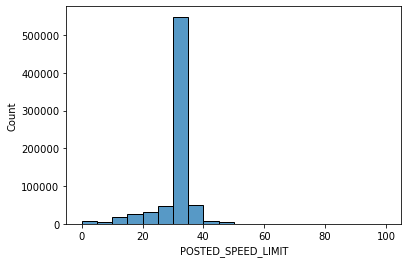

In [10]:
sns.histplot(data=df_crashes, x='POSTED_SPEED_LIMIT', binwidth=5)

Most of the crashes happened between 30 and 35 mph

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'CLEAR'),
  Text(1, 0, 'FREEZING RAIN/DRIZZLE'),
  Text(2, 0, 'RAIN'),
  Text(3, 0, 'UNKNOWN'),
  Text(4, 0, 'CLOUDY/OVERCAST'),
  Text(5, 0, 'SNOW'),
  Text(6, 0, 'FOG/SMOKE/HAZE'),
  Text(7, 0, 'OTHER'),
  Text(8, 0, 'SEVERE CROSS WIND GATE'),
  Text(9, 0, 'SLEET/HAIL'),
  Text(10, 0, 'BLOWING SNOW'),
  Text(11, 0, 'BLOWING SAND, SOIL, DIRT')])

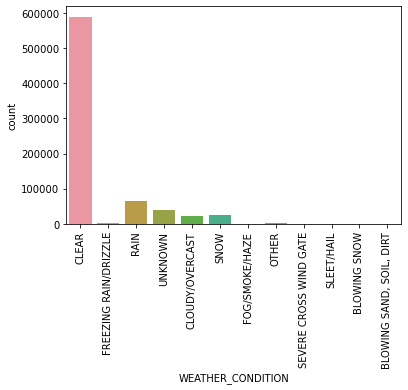

In [11]:
sns.countplot(data=df_crashes, x='WEATHER_CONDITION')
plt.xticks(rotation=90)

Bad weather didn't cause more crashes as most of the crashes happened in clear weather

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'DAYLIGHT'),
  Text(1, 0, 'DARKNESS, LIGHTED ROAD'),
  Text(2, 0, 'UNKNOWN'),
  Text(3, 0, 'DARKNESS'),
  Text(4, 0, 'DAWN'),
  Text(5, 0, 'DUSK')])

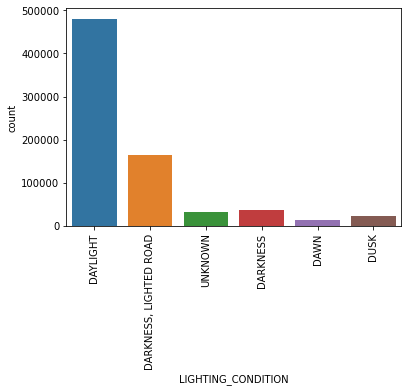

In [12]:
sns.countplot(data=df_crashes, x='LIGHTING_CONDITION')
plt.xticks(rotation=90)

Also, most of the crashes happened during the day with only about 20% that happened at night with lit roads.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'UNKNOWN'),
  Text(1, 0, 'DRY'),
  Text(2, 0, 'WET'),
  Text(3, 0, 'ICE'),
  Text(4, 0, 'OTHER'),
  Text(5, 0, 'SNOW OR SLUSH'),
  Text(6, 0, 'SAND, MUD, DIRT')])

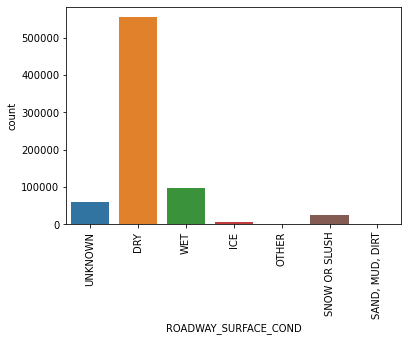

In [13]:
sns.countplot(data=df_crashes, x='ROADWAY_SURFACE_COND')
plt.xticks(rotation=90)

Most of the crashes happened on dry roads.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'NO DEFECTS'),
  Text(1, 0, 'RUT, HOLES'),
  Text(2, 0, 'UNKNOWN'),
  Text(3, 0, 'OTHER'),
  Text(4, 0, 'SHOULDER DEFECT'),
  Text(5, 0, 'WORN SURFACE'),
  Text(6, 0, 'DEBRIS ON ROADWAY')])

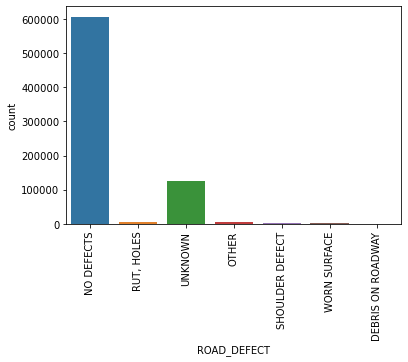

In [14]:
sns.countplot(data=df_crashes, x='ROAD_DEFECT')
plt.xticks(rotation=90)

From the visualizations, majority of the car crashes happened in conditions where they shouldn't have occured. I will end this analysis here for now; in the future I will do a more elaborate analysis and use all the features that were in this dataset